In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#creating a time series plot: 

#frist define the function: 
def logistic(x0,r):     
    P = r*x0*(1-x0)
    return P

In [9]:
#creating the loop for the iterations:
time = np.linspace(1,20,40)
x0 = 0.2
val = [x0]
r = 2.9 
for i in range (len(time)-1):
    result = logistic(x0,r)
    val.append(result)
    x0 = result
val = np.array(val)
#print(val)

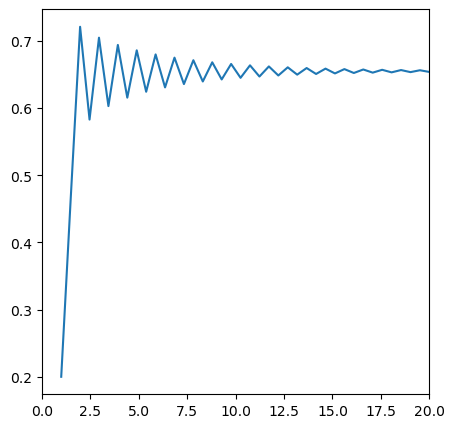

In [10]:
#plot: 
fig = plt.figure(figsize = (5,5))
plt.plot(time, val,label = "Initial circumference")
plt.xlim([0, 20])
plt.show()

In [5]:
#Now lets do for two different inital conditions: 
x0 = 0.7
y0 = 0.72 
val1 = [x0]
val2 = [y0]
r = 4.0 
for i in range (len(time)-1):
    result1 = logistic(x0,r)
    result2 = logistic(y0,r)
    val1.append(result1)
    val2.append(result2)
    x0 = result1
    y0 = result2
val1 = np.array(val1)
val2 = np.array(val2)


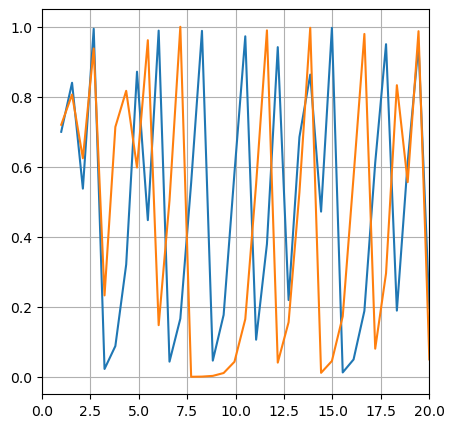

In [6]:
#plot: 
fig = plt.figure(figsize = (5,5))
plt.plot(time, val1,label = "First initial condition")
plt.plot(time, val2,label = "Second initial condition")
plt.xlim([0, 20])
plt.grid()
plt.show()

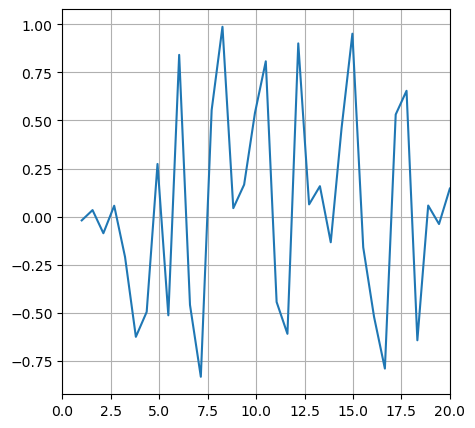

In [7]:
dif = (val1 - val2)
#plot: 
fig = plt.figure(figsize = (5,5))
plt.plot(time, dif,label = "First initial condition")
plt.xlim([0, 20])
plt.grid()
#plt.legend()
plt.show()

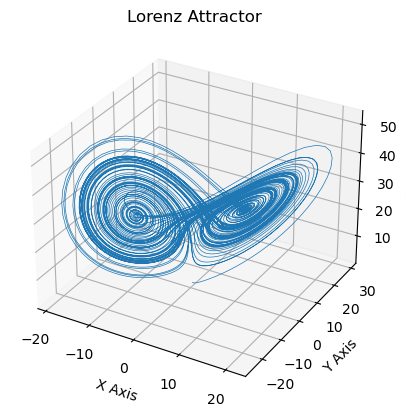

In [8]:
#plotting differential equations: LORENTZ EQUATION!!
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------------------------------------------------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.
    ----------------------------------------------------------------
    Returns
    -----------------------------------------------------------------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    -------------------------------------------------------------------
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()
